In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///data/hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Get columns from measurement
measure_col = inspector.get_columns('measurement')
for column in measure_col:
    print(column['name'])

id
station
date
prcp
tobs


In [10]:
# Get Columns from station
station_col = inspector.get_columns('station')
for column in station_col:
    print(column['name'])

id
station
name
latitude
longitude
elevation


In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

# Calculate the date one year from the last date in data set.
recent_date = recent_date[0]
past_year = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365) 
past_year

# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= past_year).all()
rain_data


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_data, columns=['date', 'prcp'])
rain_df['date'] = pd.to_datetime(rain_df['date'], format='%Y-%m-%d')
rain_df.set_index('date', inplace=True)
#rain_df.head()

# Sort the dataframe by date
rain_df.sort_values(by='date', ascending=True)
rain_df.head(20)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


<function matplotlib.pyplot.show>

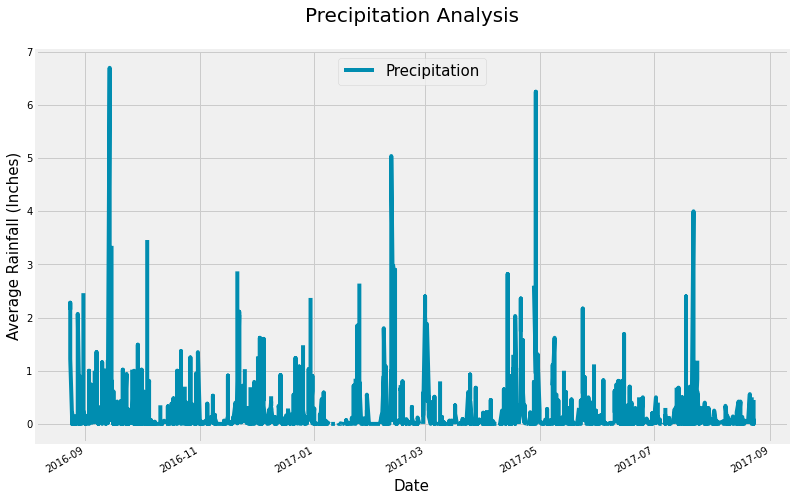

In [32]:
# Plot the results using the DataFrame plot method.

rain_df.plot(figsize=(12,8), color="#008db0")
plt.title("Precipitation Analysis\n", fontsize=20)
plt.legend(["Precipitation"], loc='upper center', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Rainfall (Inches)', fontsize=15)
plt.savefig("Images/Precipitation.png")
plt.show

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data

rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f'There are {station_count} stations')

There are 9 stations


In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = active_station[0][0]
temp_calc = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == top_station).all()

print(f'The high temperature is {temp_calc[0][1]} degrees.')
print(f'The low temperature is {temp_calc[0][0]} degrees.')
print(f'The average temperature is {temp_calc[0][2]} degrees.')   

The high temperature is 85.0 degrees.
The low temperature is 54.0 degrees.
The average temperature is 71.66378066378067 degrees.


In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year=session.query(Measurement.tobs).\
        filter(Measurement.station=='USC00519281').\
        filter(Measurement.date >= past_year).all()

station_year_df = pd.DataFrame(station_year, columns=['tobs'])
station_year_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


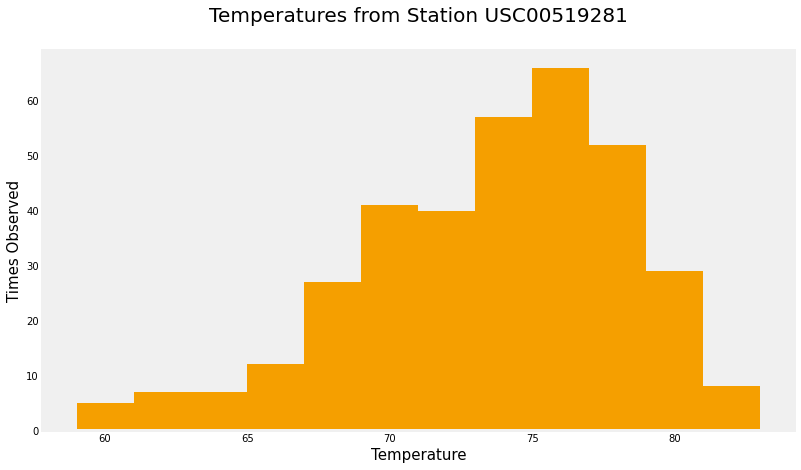

In [42]:
# Create histogram
plt.figure(figsize=(12, 7))
plt.hist(station_year_df["tobs"], color='#f59f00', bins=12)
plt.ylabel('Times Observed',fontsize=15)
plt.xlabel('Temperature',fontsize=15)
plt.title('Temperatures from Station USC00519281\n',fontsize=20)
plt.grid()
plt.savefig('Images/histogram_avg_employee_salary')
plt.show()

# Close session

In [43]:
# Close Session
session.close()